# ***Importing Libraries***

In [ ]:
import numpy as np
import sys
np.set_printoptions(threshold=10)
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Load the dataset***

In [ ]:
#dataset=pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer_Project-main/Ovarian_Cancer_Project-main/ovariantotal.csv')
df=pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer_Project-main/Ovarian_Cancer_Project-main/ovariantotal.csv')
df.head()

AFP     AG  Age   ALB  ALP  ALT  AST  BASO#  BASO%   BUN  ...   PCT  \
0   3.58  19.36   47  45.4   56   11   24   0.01   0.30  5.35  ...  0.09   
1  34.24  23.98   61  39.9   95    9   13   0.02   0.30  3.21  ...  0.30   
2   1.50  18.40   39  45.4   77    9   18   0.03   0.60  3.80  ...  0.13   
3   2.75  16.60   45  39.2   26   16   17   0.05   0.74  5.27  ...  0.25   
4   2.36  19.97   45  35.0   47   21   27   0.01   0.10  4.89  ...  0.28   

    PDW  PHOS  PLT   RBC   RDW  TBIL    TP     UA  TYPE  
0  13.4  1.46   74  2.64  13.7   5.5  73.9  396.4     0  
1  11.2  1.09  304  4.89  12.7   6.8  72.0  119.2     0  
2  15.2  0.97  112  4.62  12.0  14.8  77.9  209.2     0  
3  17.4  1.25  339  4.01  14.6  10.9  66.1  215.6     0  
4  11.9  0.94  272  4.40  13.4   5.3  66.5  206.0     0  

[5 rows x 50 columns]

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X) #for numerical columns
X=imputer.transform(X)

df=pd.DataFrame(X)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['TYPE'], axis=1),
    df['TYPE'],
    test_size=0.2,
    random_state=1)

In [ ]:
X_train.head() 
X_train.shape

(279, 49)

In [ ]:
X_test.head()
X_test.shape

(70, 49)

In [ ]:
y_train.head()  
y_train.shape

(279,)

In [ ]:
y_test.shape


(70,)

In [ ]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(49,49))
corr = pd.DataFrame(df).corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.08905132, 0.        , 0.17553164, ..., 0.01491813, 0.01758965,
       0.        ])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

HE4          0.352804
NEU          0.245934
CA125        0.224114
Age          0.175532
Menopause    0.134813
LYM%         0.098458
AFP          0.089051
CEA          0.087943
PCT          0.086138
PLT          0.071406
ALB          0.069201
CL           0.068909
MONO#        0.067484
ALP          0.067177
PDW          0.060112
Na           0.060048
MONO%        0.057231
CA19-9       0.055419
BASO#        0.048602
HGB          0.036369
BASO%        0.029638
GLO          0.029528
RDW          0.023090
K            0.023085
CA72-4       0.022719
GLU.         0.019590
TP           0.017590
CO2CP        0.015196
TBIL         0.014918
DBIL         0.010583
GGT          0.009361
MCH          0.003221
PHOS         0.000000
MPV          0.000000
RBC          0.000000
HCT          0.000000
Mg           0.000000
MCV          0.000000
LYM#         0.000000
IBIL         0.000000
AG           0.000000
EO%          0.000000
EO#          0.000000
CREA         0.000000
Ca           0.000000
BUN       

<AxesSubplot:>

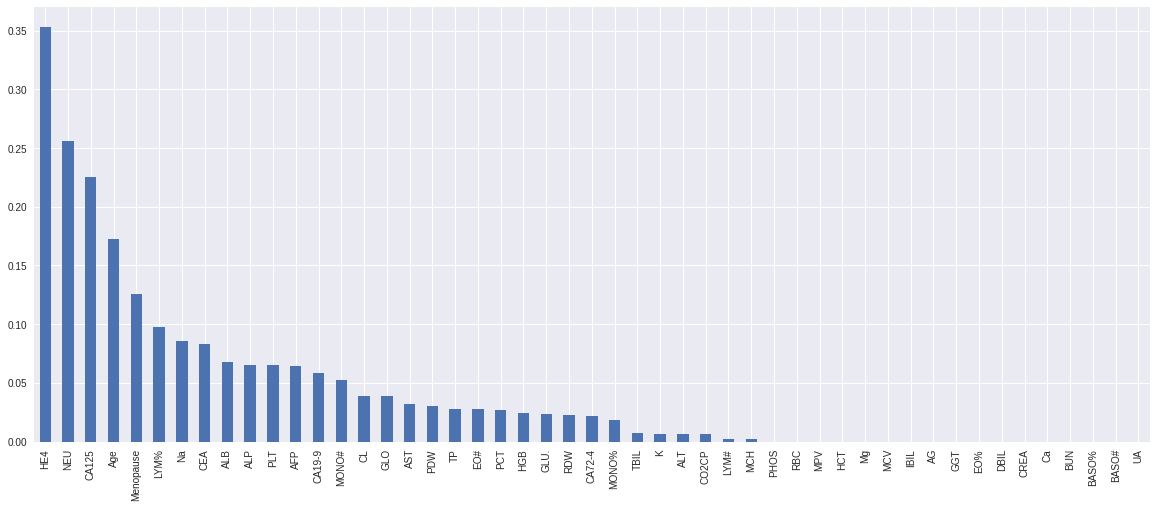

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=25)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()] 

Index(['AFP', 'Age', 'ALB', 'ALP', 'Ca', 'CA125', 'CA19-9', 'CEA', 'CL', 'EO%',
       'GLO', 'GLU.', 'HE4', 'HGB', 'LYM%', 'Menopause', 'MONO#', 'MONO%',
       'Na', 'NEU', 'PCT', 'PDW', 'PLT', 'TBIL', 'TP'],
      dtype='object')

In [ ]:
X_train=X_train[['HE4', 'NEU', 'CA125', 'Age', 'CEA', 'LYM%', 'Menopause', 'Na', 'ALB', 'PLT', 'ALP', 'MONO#', 'AFP', 'CA19-9', 'CL','RDW','MCH','MONO%','GLO','PCT','TBIL','PDW','CA72-4','TP','HGB']]



In [ ]:
X_test=X_test[['HE4', 'NEU', 'CA125', 'Age', 'CEA', 'LYM%', 'Menopause', 'Na', 'ALB', 'PLT', 'ALP', 'MONO#', 'AFP', 'CA19-9', 'CL','RDW','MCH','MONO%','GLO','PCT','TBIL','PDW','CA72-4','TP','HGB']]

X_test.head()

HE4   NEU    CA125  Age   CEA  LYM%  Menopause     Na   ALB  PLT  \
192    36.81  76.0    29.85   30  1.54  16.3          0  142.3  41.6  272   
256    46.58  50.3    21.94   44  1.20  39.0          0  141.7  43.1  299   
169  1309.00  77.7  2154.00   42  0.80  17.4          0  140.5  39.1  284   
67    183.94  76.8  2741.00   69  0.55  16.1          1  145.2  31.6  309   
201    56.91  49.1    43.41   20  0.59  37.5          0  139.1  32.6  340   

     ...   RDW   MCH  MONO%   GLO    PCT  TBIL   PDW  CA72-4    TP    HGB  
192  ...  15.8  29.1   6.24  24.6  0.184  12.2  16.5    1.56  66.2  118.0  
256  ...  13.2  28.1   4.90  29.3  0.340  17.7  13.5   10.17  72.4  128.0  
169  ...  15.0  27.1   4.30  26.2  0.320  14.6  14.5   10.17  65.3  147.0  
67   ...  12.3  28.5   6.30  32.4  0.320   5.2  11.5   10.17  64.0  125.0  
201  ...  13.3  24.0   8.10  31.1  0.360   2.7  12.3   10.17  63.7  109.0  

[5 rows x 25 columns]

In [ ]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = pd.DataFrame(X_train).corr()
corr.style.background_gradient(cmap='coolwarm')

# ***Feature Scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

print(X_train)

[[-0.37412506  0.00619545 -0.40205538 ... -0.00612426  0.93395688
   0.36546244]
 [ 0.07758872  1.88440908  0.04230901 ... -0.00612426 -0.51697453
  -0.12454307]
 [ 2.19757598  1.42305748  0.6597819  ... -0.00612426 -2.15426411
  -0.18579376]
 ...
 [-0.00701354  0.78741749 -0.35036748 ... -0.00612426  0.98720207
  -0.92080202]
 [-0.35276688 -0.68890763 -0.39440527 ... -0.31348993  0.21514683
  -0.12454307]
 [ 2.0820913  -0.93496182  1.14846971 ... -0.00612426 -0.53028583
   0.73296658]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
print(X_test)

[[3.6810e+01 7.6000e+01 2.9850e+01 ... 1.5600e+00 6.6200e+01 1.1800e+02]
 [4.6580e+01 5.0300e+01 2.1940e+01 ... 1.0170e+01 7.2400e+01 1.2800e+02]
 [1.3090e+03 7.7700e+01 2.1540e+03 ... 1.0170e+01 6.5300e+01 1.4700e+02]
 ...
 [5.9470e+01 6.6580e+01 2.0940e+01 ... 1.0170e+01 6.9200e+01 1.3000e+02]
 [1.8394e+02 4.6300e+01 3.5560e+01 ... 1.0170e+01 6.6700e+01 1.2100e+02]
 [3.3420e+01 6.6580e+01 4.6450e+01 ... 1.0170e+01 6.8600e+01 1.2800e+02]]


# ***RANDOM FORESTS***

In [ ]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
%matplotlib inline

In [ ]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

m_best = CV_rfc.best_estimator_ 
print(m_best)

y_t = m_best.predict(X_train)
train_acc = accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=200, random_state=42)


In [ ]:
test_acc = accuracy_score(y_test, y_pred) 
print(accuracy_score(y_test,y_pred)) 
print(precision_score(y_test,y_pred)) 
print(f1_score(y_test, y_pred))  
print(recall_score(y_test,y_pred))


print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred)) 
print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
'''print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)'''
    
pred_prob3 = m_best.predict_proba(X_test) 
print(classification_report(y_test,y_pred))

0.9
0.8974358974358975
0.9090909090909091
0.9210526315789473
Training confusion matrix
[[129  10]
 [  0 140]]
Testing confusion matrix
[[28  4]
 [ 3 35]]
Train accuracy: 0.9642
Test accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.90      0.92      0.91        38

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70



# ***Logistic Regression***

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lr=LogisticRegression(random_state=42)
model_lr = GridSearchCV(lr, param_grid=grid_values)

model_lr.fit(X_train,y_train)

m_best = model_lr.best_estimator_

y_t = m_best.predict(X_train)
train_acc = accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test) 
print(y_pred) 



test_acc = accuracy_score(y_test, y_pred) 
print(accuracy_score(y_test,y_pred)) 
print(metrics.precision_score(y_test,y_pred)) 
print(metrics.recall_score(y_test,y_pred))
print(metrics.f1_score(y_test, y_pred))  



print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))


    
pred_prob5 = m_best.predict_proba(X_test)  
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[1 1 0 ... 1 0 1]
0.8428571428571429
0.8292682926829268
0.8947368421052632
0.860759493670886
Training confusion matrix
[[122  17]
 [  4 136]]
Testing confusion matrix
[[25  7]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.83      0.89      0.86        38

    accuracy                           0.84        70
   macro avg       0.85      0.84      0.84        70
weighted avg       0.84      0.84      0.84        70



In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob = m_best.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9177631578947368

<ipython-input-19-ba02e40565ca>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


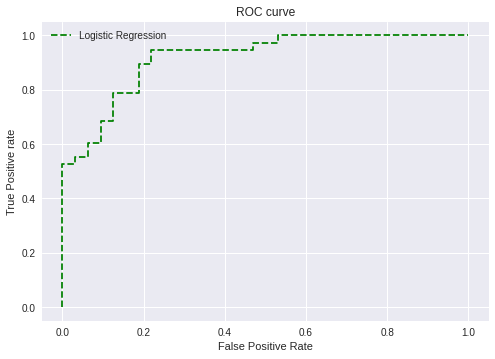

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='green', label='Logistic Regression')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=75a8ada9d511cd9bff34f7be79cfaf7089b82c326df99e30c46a686c7969b45c
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
pip install sklearn.ensemble

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.ensemble (from versions: none)
ERROR: No matching distribution found for sklearn.ensemble


### ***XGBOOST***

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 4,
    verbose=True
)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_

m_best = grid_search.best_estimator_ 
print(m_best)

y_t = m_best.predict(X_train)
train_acc = accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc)) 
print(accuracy_score(y_test,y_pred))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

'''print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)

pred_prob2 = m_best.predict_proba(X_test) '''

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(y_test,y_pred))

Fitting 4 folds for each of 96 candidates, totalling 384 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)
Train accuracy: 1.0000
Test accuracy: 0.9000
0.9
Precision: 0.9189
Recall: 0.8947
F1: 0.9067
Training confusion matrix
[[139   0]
 [  0 140]]
Testing confusion matrix
[[29  3]
 [ 4 34]]
[[29  3]
 [

## ***GRADIENT BOOSTING MACHINE***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import metrics 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from matplotlib import pyplot


In [ ]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42)

baseline.fit(X_train, y_train)

gbm_predict_train = baseline.predict(X_train)

#get accuracy
gbm_accuracy = metrics.accuracy_score(y_train, gbm_predict_train)

#print accuracy
print ("GBM training Accuracy: {0:.4f}".format(gbm_accuracy))

gbm_predict_test = baseline.predict(X_test)

#get accuracy
gbm_accuracy_testdata = metrics.accuracy_score(y_test, gbm_predict_test)

#print accuracy
print ("GBM testing Accuracy: {0:.4f}".format(gbm_accuracy_testdata))

from sklearn.metrics import log_loss
logloss = log_loss(y_test, gbm_predict_test)
print ("GBM Log Loss: {0:.4f}".format(logloss))

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, gbm_predict_test)
print ("GBM AUC: {0:.4f}".format(auc)) 
print(metrics.precision_score(y_test,y_pred)) 
print(metrics.recall_score(y_test,y_pred))
print(metrics.f1_score(y_test, y_pred))  



#print('Training confusion matrix')
#print(confusion_matrix(y_train, gbm_predict_train))
#print('Testing confusion matrix')
#print(confusion_matrix(y_test, gbm_predict_test))

#print ("Confusion Matrix for GBM")

# labels for set 1=True to upper left and 0 = False to lower right
#print ("{0}".format(metrics.confusion_matrix(y_test, gbm_predict_test, labels=[1, 0])))

#print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, gbm_predict_test, labels=[1, 0])))


GBM training Accuracy: 1.0000
GBM testing Accuracy: 0.8571
GBM Log Loss: 5.1491
GBM AUC: 0.8586
0.918918918918919
0.8947368421052632
0.9066666666666667
Classification Report

              precision    recall  f1-score   support

           1       0.89      0.84      0.86        38
           0       0.82      0.88      0.85        32

    accuracy                           0.86        70
   macro avg       0.86      0.86      0.86        70
weighted avg       0.86      0.86      0.86        70



## ***LIGHT GRADIENT BOOSTING***

In [ ]:
import lightgbm as lgb
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics


In [ ]:
params = {
    'application': 'binary', 
    'boosting': 'gbdt', 
    'num_iterations': 100, 
    'learning_rate': 0.05,
    'num_leaves': 62,
    'device': 'cpu', 
    'max_depth': -1, 
    'max_bin': 510, 
    'lambda_l1': 5, 
    'lambda_l2': 10, 
    'metric' : 'binary_error',
    'subsample_for_bin': 200, 
    'subsample': 1,
    'colsample_bytree': 0.8,
    'min_split_gain': 0.5, 
    'min_child_weight': 1, 
    'min_child_samples': 5
}

mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'], 
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'], 
          min_split_gain = params['min_split_gain'], 
          min_child_weight = params['min_child_weight'], 
          min_child_samples = params['min_child_samples'])

mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin'])

In [ ]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt', 'dart'], 
    'objective' : ['binary'],
    'max_bin':[255, 510], 
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(mdl, gridParams, verbose=1, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_bin=510, min_child_samples=5,
                                      min_child_weight=1, min_split_gain=0.5,
                                      n_jobs=5, objective='binary', silent=True,
                                      subsample=1, subsample_for_bin=200),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.64, 0.65, 0.66],
                         'learning_rate': [0.005, 0.01], 'max_bin': [255, 510],
                         'n_estimators': [8, 16, 24],
                         'num_leaves': [6, 8, 12, 16], 'objective': ['binary'],
                         'random_state': [500], 'reg_alpha': [1, 1.2],
                         'reg_lambda': [1, 1.2, 1.4],
                         'subsample': [0.7, 0.75]},
             verbose=1)

In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test) 

watchlist = [d_train, d_test]

model = lgb.train(params, train_set=d_train, num_boost_round=1000, valid_sets=watchlist, early_stopping_rounds=50, verbose_eval=4)

y_t = model.predict(X_train)
y_t = np.where(y_t > 0.5, 1, 0)

train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

test_acc = metrics.accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss)) 
print (metrics.classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 140, number of negative: 139
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1253
[LightGBM] [Info] Number of data points in the train set: 279, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501792 -> initscore=0.007168
[LightGBM] [Info] Start training from score 0.007168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's binary_error: 0.0860215	valid_1's binary_error: 0.128571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


# ***Voting Classifier***

####Hard Voting

In [ ]:
estimator = []
estimator.append(('LR', LogisticRegression(random_state=1)))
estimator.append(('GBC', GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42)))
estimator.append(('XGB', XGBClassifier()))
estimator.append(('LGBM', lgb.LGBMClassifier())) 
estimator.append(('RF', RandomForestClassifier(n_estimators = 1000, random_state = 42)))

In [ ]:
from sklearn.ensemble import VotingClassifier
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred)) 
print(metrics.precision_score(y_test,y_pred)) 
print(metrics.f1_score(y_test, y_pred))  



0.8857142857142857
0.8947368421052632
0.8947368421052632


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.89      0.89      0.89        38

    accuracy                           0.89        70
   macro avg       0.88      0.88      0.88        70
weighted avg       0.89      0.89      0.89        70



<Axes: >

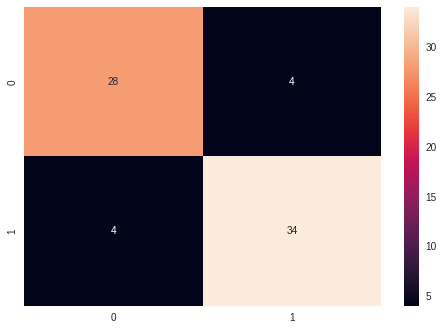

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)